# A/B Testing with Bayesian Analysis : Identifying products with more potentials

### Explore Dataset and determine priors

Let us first see the dataset

In [1]:
import pandas as pd
ads = pd.read_csv("dataset/ads.csv")
ads.head()

,user_id,product,site_version,time,banner_clicked
0,f500b9f27ac611426935de6f7a52b71f,clothes,desktop,2019-01-28 16:47:08,0
1,cb4347c030a063c63a555a354984562f,sneakers,mobile,2019-03-31 17:34:59,0
2,89cec38a654319548af585f4c1c76b51,clothes,mobile,2019-02-06 09:22:50,0
3,1d4ea406d45686bdbb49476576a1a985,sneakers,mobile,2019-05-23 08:07:07,0
4,d14b9468a1f9a405fa801a64920367fe,clothes,mobile,2019-01-28 08:16:37,0


We will create a helper function that will take a list of simulation as trials and some priors and then use these informations to generate posteriors. This is nothing but a beta distribution. We will be using beta distribution because it is a good choice for bayesian analysis due to:
- The Beta distribution is the conjugate prior for the Binomial distribution : if we start with a Beta prior and update it with Binomial data (`banner_clicked`), the posterior distribution is also a Beta distribution.
- Bounded support Limited to [0, 1]: Good way to show distribution of probability for a variable
- Variety of Shapes: we can change the shape of the distribution by the two parameters α and 𝛽. This flexibility allows it to represent a wide range of prior beliefs about the probability.

In [2]:
import numpy as np
def simulate_beta_posterior(trials, beta_prior_a, beta_prior_b):
    num_successes = np.sum(trials)
    return np.random.beta(num_successes + beta_prior_a, len(trials) - num_successes + beta_prior_b, 10000)

A company has just run two pilot advertising campaigns: one for sneakers, and one for clothes. Our job is to find out which one was more effective as measured by the click-through rate and should be rolled out to a larger audience.

We have decided to run A/B testing, modeling the data using the binomial likelihood. We found out that a typical click-through rate for the previous ads has been around 15% recently, with results varying between 5% and 30%. Based on this, let us conclude that beta(10,50) would be a good prior for the click-through rate. Now we will generate prior draws with the helper function and visualize the distribution.

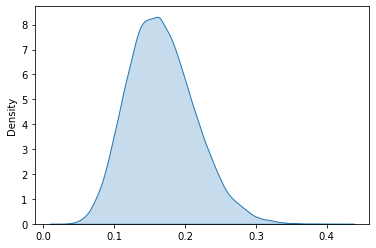

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
# Generate prior draws
prior_draws = np.random.beta(10, 50, size=100000) 

# Plot the prior
sns.kdeplot(prior_draws, shade=True, label="prior")
plt.show()

We will now sort out the two products into different dataframes 